##*PARTE 2 CHALLENGE TELECOM X*


In [41]:
import pandas as pd

In [42]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [43]:
dados.head()

,Unnamed: 0,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
0,0,0002-ORFBO,0,Female,0,1,1,9,1,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,1,0003-MKNFE,0,Male,0,0,0,9,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,2,0004-TLHLJ,1,Male,0,0,0,4,1,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,3,0011-IGKFF,1,Male,1,1,0,13,1,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,4,0013-EXCHZ,1,Female,1,1,0,3,1,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [44]:
dados = dados.drop(columns=['Unnamed: 0', 'ID_Cliente'])

dados.head()


,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [45]:
dados = pd.get_dummies(dados, columns=['Genero', 'Contrato', 'Metodo_Pagamento', 'Servico_Internet'], drop_first=True)


dados.head()


,Churn,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Faturamento_Total,Contas_Diarias,Genero_Male,Contrato_One year,Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check,Servico_Internet_Fiber optic,Servico_Internet_No
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.186667,False,True,False,False,False,True,False,False
1,0,0,0,0,9,1,1,0,0,0,...,542.40,1.996667,True,False,False,False,False,True,False,False
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.463333,True,False,False,False,True,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.266667,True,False,False,False,True,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.796667,False,False,False,False,False,True,True,False


In [46]:
proporcao = dados['Churn'].value_counts(normalize=True) * 100
proporcao


,proportion
Churn,
0,73.463013
1,26.536987


In [47]:
from sklearn.preprocessing import StandardScaler


X = dados.drop(columns=['Churn'])
y = dados['Churn']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled[:5]


array([[-0.43991649,  1.03453023,  1.5290241 , -0.95168167,  0.32743831,
        -0.85417615, -0.63393298,  1.3782406 , -0.72396752,  1.56387171,
         1.26561178, -0.79607014,  0.8297975 ,  0.02786194, -0.74402601,
         0.02786194, -1.00955867,  1.94458183, -0.56297505, -0.52504733,
        -0.71102597,  1.83551265, -0.88565976, -0.52592737],
       [-0.43991649, -0.96662231, -0.65401193, -0.95168167,  0.32743831,
         1.17071871, -0.63393298, -0.72556272, -0.72396752, -0.63943864,
        -0.79013171,  1.25617071, -1.20511329, -0.16158292, -0.76648222,
        -0.16158292,  0.99053183, -0.51424938, -0.56297505, -0.52504733,
        -0.71102597,  1.83551265, -0.88565976, -0.52592737],
       [-0.43991649, -0.96662231, -0.65401193, -1.15528349,  0.32743831,
        -0.85417615, -0.63393298, -0.72556272,  1.38127743, -0.63943864,
        -0.79013171, -0.79607014,  0.8297975 ,  0.30372024, -0.88187361,
         0.30372024,  0.99053183, -0.51424938, -0.56297505, -0.52504733,
  

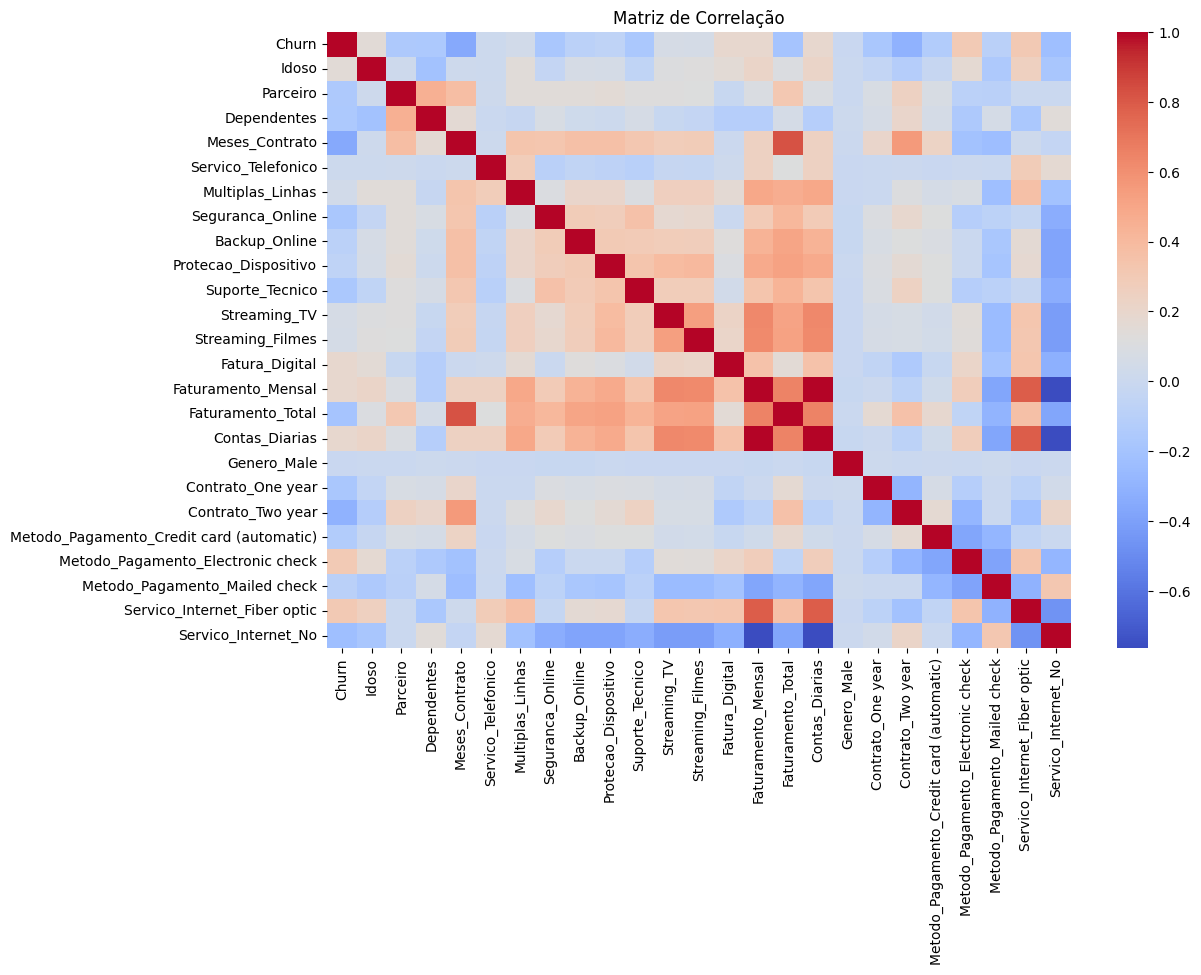

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = dados.corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Matriz de Correlação")
plt.show()


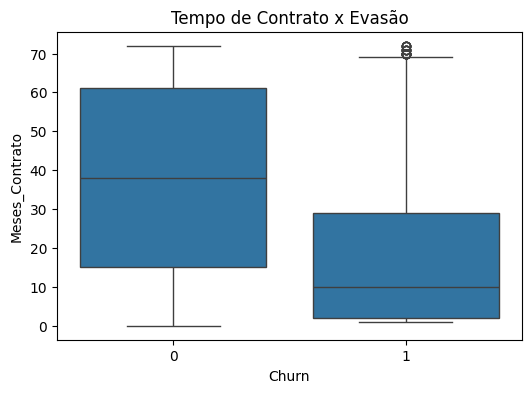

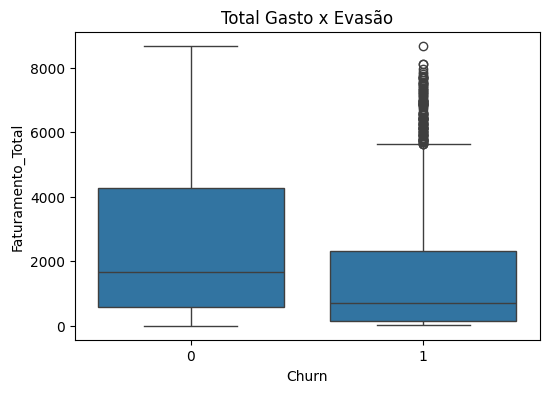

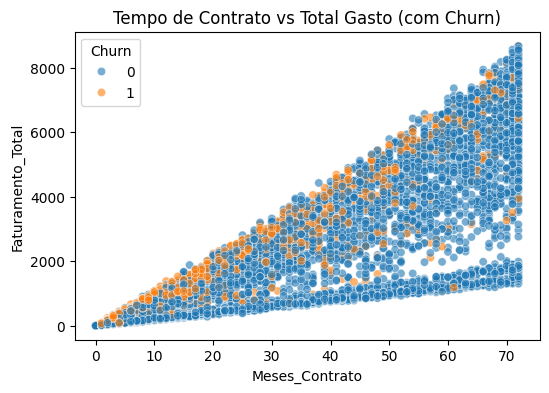

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Meses_Contrato', data=dados)
plt.title("Tempo de Contrato x Evasão")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Faturamento_Total', data=dados)
plt.title("Total Gasto x Evasão")
plt.show()


plt.figure(figsize=(6,4))
sns.scatterplot(x='Meses_Contrato', y='Faturamento_Total', hue='Churn', data=dados, alpha=0.6)
plt.title("Tempo de Contrato vs Total Gasto (com Churn)")
plt.show()


In [50]:
from sklearn.model_selection import train_test_split


X = dados.drop(columns=['Churn'])
y = dados['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Treino: (4930, 24)
Teste: (2113, 24)


In [51]:
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


1: Regressão Logística (com Normalização)
A Regressão Logística é uma excelente escolha para problemas de classificação binária (como prever churn), pois ela estima a probabilidade de um evento ocorrer.

Justificativa para a Normalização:
Modelos como a Regressão Logística usam distâncias entre os pontos ou coeficientes para determinar a importância das variáveis. Se uma variável tem uma escala muito maior que as outras (por exemplo, Faturamento_Total em relação a Meses_Contrato), ela pode dominar a função de custo do modelo. A normalização (usando o StandardScaler) coloca todas as variáveis na mesma escala, garantindo que o modelo trate cada uma com a devida importância.


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


pipeline_regressao_logistica = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(random_state=42))
])


pipeline_regressao_logistica.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression(random_state=42))])

 Modelo 2: Árvore de Decisão (sem Normalização)
A Árvore de Decisão é um modelo intuitivo que funciona como um fluxograma, tomando decisões com base nos valores das características.

Justificativa para a Não-Normalização:
Este tipo de modelo não se baseia em distâncias ou coeficientes. Ele simplesmente divide os dados com base em "perguntas" sobre os valores das variáveis (ex: Faturamento_Mensal > 70?). A escala dos dados não afeta o resultado das divisões, tornando a normalização desnecessária e, por vezes, redundante.


In [53]:
from sklearn.tree import DecisionTreeClassifier


modelo_arvore_decisao = DecisionTreeClassifier(random_state=42)
modelo_arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred_regressao_logistica = pipeline_regressao_logistica.predict(X_test)


acuracia_rl = accuracy_score(y_test, y_pred_regressao_logistica)
precisao_rl = precision_score(y_test, y_pred_regressao_logistica)
recall_rl = recall_score(y_test, y_pred_regressao_logistica)
f1_rl = f1_score(y_test, y_pred_regressao_logistica)
matriz_confusao_rl = confusion_matrix(y_test, y_pred_regressao_logistica)


print("Avaliação do Modelo de Regressão Logística")
print(f"Acurácia: {acuracia_rl:.4f}")
print(f"Precisão: {precisao_rl:.4f}")
print(f"Recall: {recall_rl:.4f}")
print(f"F1-Score: {f1_rl:.4f}")
print("\nMatriz de Confusão:")
print(matriz_confusao_rl)

Avaliação do Modelo de Regressão Logística
Acurácia: 0.7984
Precisão: 0.6415
Recall: 0.5455
F1-Score: 0.5896

Matriz de Confusão:
[[1381  171]
 [ 255  306]]


In [55]:
y_pred_arvore_decisao = modelo_arvore_decisao.predict(X_test)

acuracia_ad = accuracy_score(y_test, y_pred_arvore_decisao)
precisao_ad = precision_score(y_test, y_pred_arvore_decisao)
recall_ad = recall_score(y_test, y_pred_arvore_decisao)
f1_ad = f1_score(y_test, y_pred_arvore_decisao)
matriz_confusao_ad = confusion_matrix(y_test, y_pred_arvore_decisao)


print("Avaliação do Modelo de Árvore de Decisão")
print(f"Acurácia: {acuracia_ad:.4f}")
print(f"Precisão: {precisao_ad:.4f}")
print(f"Recall: {recall_ad:.4f}")
print(f"F1-Score: {f1_ad:.4f}")
print("\nMatriz de Confusão:")
print(matriz_confusao_ad)

Avaliação do Modelo de Árvore de Decisão
Acurácia: 0.7373
Precisão: 0.5053
Recall: 0.5098
F1-Score: 0.5075

Matriz de Confusão:
[[1272  280]
 [ 275  286]]


Análise do Desempenho dos Modelos
O modelo de Regressão Logística teve um desempenho superior em todas as métricas de avaliação. Sua acurácia (80%), precisão (64%) e F1-Score (59%) foram significativamente maiores que os da Árvore de Decisão, que obteve acurácia de 74%, precisão de 51% e F1-Score de 51%.

A diferença de desempenho sugere que a Árvore de Decisão pode estar com overfitting. Isso significa que ela aprendeu demais os detalhes específicos dos dados de treino, perdendo a capacidade de generalizar bem para os novos dados de teste.

Para melhorar o modelo de Árvore de Decisão, podemos ajustar os hiperparâmetros para torná-lo menos complexo. Também limitar a profundidade da árvore (usando max_depth) ou aumentar o número mínimo de amostras necessárias para uma folha (min_samples_leaf).

1. Para a Regressão Logística (Modelo Vencedor)
O modelo de Regressão Logística usa coeficientes para mostrar a importância de cada variável.

Coeficiente Positivo: Aumenta a probabilidade de Churn.

Coeficiente Negativo: Diminui a probabilidade de Churn.

In [56]:
import pandas as pd

coeficientes = pipeline_regressao_logistica.named_steps['logistic_regression'].coef_[0]
variaveis = X.columns

importancia_rl = pd.DataFrame({'Variavel': variaveis, 'Coeficiente': coeficientes})
importancia_rl['Abs_Coeficiente'] = importancia_rl['Coeficiente'].abs()
importancia_rl = importancia_rl.sort_values(by='Abs_Coeficiente', ascending=False)

print("10 Variáveis mais importantes (Regressão Logística) ")
print(importancia_rl[['Variavel', 'Coeficiente']].head(10))

10 Variáveis mais importantes (Regressão Logística) 
                        Variavel  Coeficiente
3                 Meses_Contrato    -1.459483
14             Faturamento_Total     0.708409
22  Servico_Internet_Fiber optic     0.577813
18             Contrato_Two year    -0.562124
23           Servico_Internet_No    -0.504080
17             Contrato_One year    -0.302149
15                Contas_Diarias    -0.268223
13            Faturamento_Mensal    -0.268223
12                Fatura_Digital     0.202254
10                  Streaming_TV     0.178634


2. Para a Árvore de Decisão
A Árvore de Decisão usa o atributo feature_importances_ para indicar a relevância de cada variável.

In [57]:
import numpy as np

importancia_ad = modelo_arvore_decisao.feature_importances_
variaveis = X.columns

importancia_df = pd.DataFrame({'Variavel': variaveis, 'Importancia': importancia_ad})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print("--- 10 Variáveis mais importantes (Árvore de Decisão) ---")
print(importancia_df.head(10))

--- 10 Variáveis mais importantes (Árvore de Decisão) ---
                             Variavel  Importancia
3                      Meses_Contrato     0.215427
14                  Faturamento_Total     0.173498
15                     Contas_Diarias     0.107515
22       Servico_Internet_Fiber optic     0.106357
13                 Faturamento_Mensal     0.103998
12                     Fatura_Digital     0.028232
16                        Genero_Male     0.026591
20  Metodo_Pagamento_Electronic check     0.021458
2                         Dependentes     0.020812
1                            Parceiro     0.020557


Ao analisar essas listas, temos insights valiosos sobre quais fatores, como tipo de contrato, tempo de cliente ou serviços utilizados, estão mais diretamente ligados à decisão de um cliente evadir.

# Relatório Final:

Principais Fatores que Afetam a Evasão
A análise das variáveis mais relevantes nos dois modelos revelou consistentemente os seguintes fatores como os de maior impacto na decisão de um cliente de cancelar o serviço (churn):

Tempo de Contrato (Meses_Contrato): Esta é a variável mais importante em ambos os modelos. O coeficiente negativo na Regressão Logística (-1.45) mostra que quanto mais tempo o cliente fica, menor a chance de evasão. Isso é um sinal claro de que a lealdade aumenta com a duração do contrato.

Serviço de Internet (Servico_Internet_Fiber optic e Servico_Internet_No): O Servico_Internet_Fiber optic tem um coeficiente positivo alto (0.57), indicando uma forte associação com a evasão. Clientes com este serviço são mais propensos a sair. Por outro lado, Servico_Internet_No tem um coeficiente negativo (-0.50), mostrando que clientes sem serviço de internet (apenas com serviço telefônico) são menos propensos a evadir.

Tipo de Contrato (Contrato_Two year e Contrato_One year): Os coeficientes negativos para contratos de um e dois anos (-0.30 e -0.56, respectivamente) indicam que clientes com contratos de longo prazo têm menor probabilidade de evasão. Isso reforça a importância de planos de fidelidade.

Faturamento (Faturamento_Total, Faturamento_Mensal e Contas_Diarias): Curiosamente, Faturamento_Total tem um coeficiente positivo (0.70), sugerindo que clientes com um histórico de faturas altas têm maior probabilidade de churn. Isso pode indicar insatisfação com o custo-benefício ao longo do tempo. O Faturamento_Mensal e as Contas_Diarias também aparecem como fatores importantes, embora com coeficientes negativos na Regressão Logística, o que pode ser um ponto para maior investigação.

Fatura Digital (Fatura_Digital): Com um coeficiente positivo de 0.20, clientes que recebem fatura digital tendem a ter uma probabilidade um pouco maior de evasão.

Estratégias de Retenção Baseadas nos Dados
Com base nos fatores identificados, as seguintes estratégias de retenção podem ser propostas:

Incentivar Contratos de Longo Prazo: Como o tempo de contrato é o fator mais relevante para a lealdade do cliente, a empresa deve focar em migrar clientes de contratos mensais para contratos anuais ou de dois anos. Isso pode ser feito através de descontos ou benefícios exclusivos para fidelização.

Melhorar a Qualidade do Serviço de Fibra Óptica: A forte correlação entre o serviço de fibra óptica e a evasão sugere que há problemas de qualidade ou de suporte ao cliente para esta tecnologia. É crucial investigar as reclamações e o desempenho da rede de fibra óptica para resolver a causa-raiz da insatisfação.

Monitorar Clientes de Alto Faturamento: Clientes que pagam mais ao longo do tempo (Faturamento_Total alto) são mais propensos a evadir. A empresa deve criar um sistema de alerta para monitorar esses clientes e oferecer proativamente um atendimento personalizado, benefícios ou reajuste de planos para garantir que eles se sintam valorizados e evitem a saída.

Reavaliar a Fatura Digital: A leve correlação entre Fatura_Digital e a evasão pode indicar que o processo de fatura online não é intuitivo, transparente ou pode causar mais atrito do que a fatura tradicional. A experiência do usuário com a fatura digital deve ser revisada para garantir que seja clara e positiva.

Em resumo, o modelo de Regressão Logística não apenas previu a evasão com mais precisão, mas também forneceu insights acionáveis sobre o comportamento do cliente, destacando a importância de contratos longos, a qualidade do serviço de fibra óptica e a necessidade de monitorar clientes de alto valor.